# Part 2:
## Import of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
foodtruck_data = pd.read_csv("data/features_foodtruck.csv")
foodtruck_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             664 non-null    object 
 1   Day              664 non-null    object 
 2   Time             302 non-null    object 
 3   Hour_missing     664 non-null    float64
 4   Hour             664 non-null    float64
 5   Petite Frite     664 non-null    int64  
 6   Moyenne Frite    664 non-null    int64  
 7   Grande Frite     664 non-null    int64  
 8   Burger           664 non-null    int64  
 9   valeur commande  664 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 52.0+ KB


### Predict missing hours using logistic regression

In [3]:
#group by day and hour
ft_all_df_grouped = foodtruck_data.groupby(['Day', 'Hour']).mean()['valeur commande']
ft_all_df_grouped

Day        Hour
Friday     18.0    22.000000
           19.0    23.000000
           20.0    18.950000
           21.0    15.800000
Saturday   18.0    16.833333
           19.0    19.454545
           20.0    19.943396
           21.0    20.210526
           22.0    21.500000
Sunday     18.0    16.750000
           19.0    19.357143
           20.0    19.447368
           21.0    13.238095
Thursday   10.0     4.000000
           11.0     8.826667
           12.0     9.555556
           13.0    10.750000
Wednesday  11.0     7.875000
           12.0     5.870968
Name: valeur commande, dtype: float64

In [4]:
ft_time_df = foodtruck_data[["Hour", "Hour_missing"]]

#creation of a dummy variable for days to be able to go into a regression
#also creation of dummy variable for hours to be able to go into a regression
ft_time_df = pd.concat([ft_time_df, pd.get_dummies(foodtruck_data['Day'], prefix='dummy')], axis=1)
ft_time_df = pd.concat([ft_time_df, pd.get_dummies(foodtruck_data['Hour'], prefix='dummy')], axis=1)

ft_time_df.head()

,Hour,Hour_missing,dummy_Friday,dummy_Saturday,dummy_Sunday,dummy_Thursday,dummy_Wednesday,dummy_10.0,dummy_11.0,dummy_12.0,dummy_13.0,dummy_18.0,dummy_19.0,dummy_20.0,dummy_21.0,dummy_22.0
0,18.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,18.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,19.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,19.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,19.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## Logistic regression for missing hours

In [5]:
#load libraries


#load data
features_hour = ft_time_df.drop(['Hour_missing','Hour'], axis=1)
target_hour = ft_time_df['Hour_missing']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_hour, target_hour, test_size=0.3, random_state=0)

#create logistic regression model
logreg = LogisticRegression()


#fit the model
model = logreg.fit(X_train, y_train)

#predict the test set
y_pred = model.predict(X_test)

#print the accuracy
print(model.score(X_test, y_test))

0.61


In [6]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6244997998398398


Text(0.5, 1.0, 'Accuracy in function of test size')

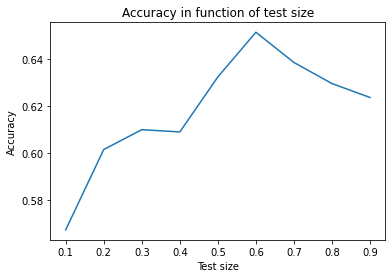

In [7]:
#plot accuracy in function of test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features_hour, target_hour, test_size=i, random_state=0)
    model = logreg.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))
plt.plot(test_size, accuracy)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of test size')

Text(0.5, 1.0, 'Accuracy in function of test size')

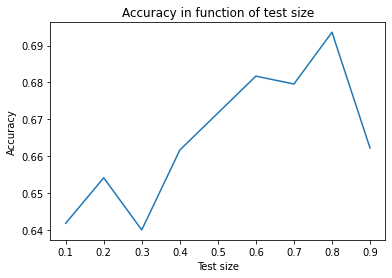

In [8]:
#Increase of the accuracy using more variables
features_hour2 = pd.concat([features_hour, foodtruck_data[["Petite Frite", "Moyenne Frite", "Grande Frite", "Burger"]]], axis=1)

#Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_hour2, target_hour, test_size=0.3, random_state=0)

#create logistic regression model
logreg2 = LogisticRegression()

#fit the model & predict the test set
model2 = logreg2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

#plot accuracy in function of test size
test_size2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy2 = []
for i in test_size2:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(features_hour2, target_hour, test_size=i, random_state=0)
    model2 = logreg2.fit(X_train2, y_train2)
    accuracy2.append(model2.score(X_test2, y_test2))
plt.plot(test_size2, accuracy2)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of test size')

In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_hour2, target_hour, test_size=0.8, random_state=0)
model2 = logreg2.fit(X_train2, y_train2)
accuracy2.append(model2.score(X_test2, y_test2))
y_pred2 = model2.predict(X_test2)

print("Accuracy of the model with all the variables:")
print(model2.score(X_test2, y_test2))

MSE = mean_squared_error(y_test2, y_pred2)
RMSE = math.sqrt(MSE)
print("\nRoot Mean Square Error:")
print(RMSE)

Accuracy of the model with all the variables:
0.693609022556391

Root Mean Square Error:
0.5535259501085825


Text(0.5, 1.0, 'Accuracy in function of test size')

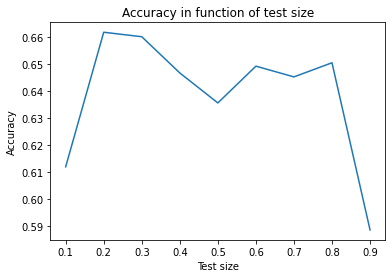

In [10]:
#Simple logistic regression
feature = pd.get_dummies(foodtruck_data['Hour'], prefix='dummy')
target = foodtruck_data['Hour_missing']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=0)

#create logistic regression model
logreg = LogisticRegression()

#fit the model & predict the test set
#plot accuracy in function of test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=i, random_state=0)
    model = logreg.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))
plt.plot(test_size, accuracy)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of test size')

## Linear regression to predict Price regarding products bought

In [11]:
ft_food_df = foodtruck_data[["Petite Frite", "Moyenne Frite", "Grande Frite", "Burger"]]
ft_food_df

,Petite Frite,Moyenne Frite,Grande Frite,Burger
0,0,0,1,2
1,0,1,0,2
2,0,2,2,0
3,0,2,0,1
4,0,0,1,2
...,...,...,...,...
659,0,4,0,0
660,0,0,1,0
661,0,0,0,8
662,0,0,1,0


In [12]:
#load libraries
from sklearn.linear_model import LinearRegression

#load data
features = ft_food_df
target = foodtruck_data['valeur commande']

#create linear regression model
regression = LinearRegression()

#fit the model
model = regression.fit(features, target)

#view the coefficients which are the weights of the model with the features
df_coef_price = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
df_coef_price

,Coefficient
Petite Frite,2.0
Moyenne Frite,3.0
Grande Frite,4.0
Burger,6.0


### Predict price using All features

In [18]:
#Load time features
feature = pd.concat([features_hour, foodtruck_data[["Petite Frite", "Moyenne Frite", "Grande Frite", "Burger"]]], axis=1)
target = foodtruck_data['valeur commande']

#create linear regression model
regression = LinearRegression()

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=0)

#fit the model & predict the test set
model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

#print the accuracy
print(model.score(X_test, y_test))

1.0


# RANDOM FOREST

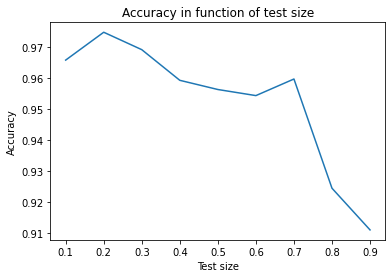

In [20]:
#load data
features = pd.concat([features_hour, foodtruck_data[["Petite Frite", "Moyenne Frite", "Grande Frite", "Burger"]]], axis=1)
target = foodtruck_data['valeur commande']

#create random forest model
random_forest = RandomForestRegressor(n_estimators=100)

#Plot accuracy in function of test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=i, random_state=0)
    model = random_forest.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))
plt.plot(test_size, accuracy)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of test size')
plt.show()

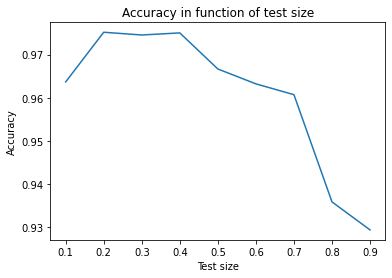

In [22]:
#load data
features = foodtruck_data[["Petite Frite", "Moyenne Frite", "Grande Frite", "Burger"]]
target = foodtruck_data['valeur commande']

#create random forest model
random_forest = RandomForestRegressor(n_estimators=100)


#Plot accuracy in function of test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=i, random_state=0)
    model = random_forest.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))
plt.plot(test_size, accuracy)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of test size')
plt.show()

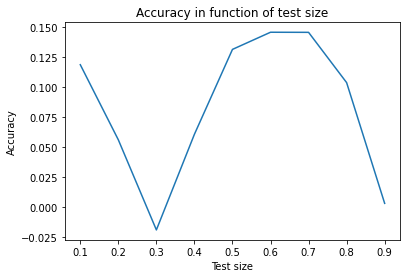

In [24]:
#load data
features = pd.concat([features_hour, foodtruck_data[["Petite Frite", "Moyenne Frite", "Grande Frite", "Burger"]]], axis=1)
target = foodtruck_data['Hour_missing']

#create random forest model
random_forest = RandomForestRegressor(n_estimators=100)

#Plot accuracy in function of test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=i, random_state=0)
    model = random_forest.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))
plt.plot(test_size, accuracy)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of test size')
plt.show()